In [ ]:
import numpy as np
import keras
import matplotlib.pyplot as plt
from keras import layers
import keras_tuner as kt
from sklearn.model_selection import train_test_split

#Dados disponíveis para pesca industrial
ano = np.array([1987,2000,2002,2003,2004,2005])
pesca_ind = np.array([1,1.5,0.5,0.5,0.5,0.5])

ano_media = np.mean(ano)
ano_std = np.sqrt( np.sum((ano - ano_media)**2)/5  )
ano_normalizado = (ano - ano_media)/ano_std

pi_media = np.mean(pesca_ind)
pi_std = np.sqrt( np.sum((pesca_ind - pi_media)**2)/5  )
pi_normalizado = (pesca_ind - pi_media)/pi_std

#Dados a seram preditos e normalização
anos_sem_pesca_ind = np.array([1988,1989,1990,1991,1992,1993,1994,1995,1996,1997,1998,1999,2001])

aspi_media = np.mean(anos_sem_pesca_ind)
aspi_std = np.sqrt( np.sum((anos_sem_pesca_ind - aspi_media)**2)/12  )
aspi_normalizado = (anos_sem_pesca_ind - aspi_media)/aspi_std

In [ ]:
#Fit do modelo e salvando seus pesos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras') 
model.fit(ano_normalizado,pi_normalizado, epochs=500, verbose=1)
model.save_weights('/home/andre/Área de Trabalho/Projeto da pesca/Mexilhão/pesos pesca ind/.weights.h5', overwrite=False)

#Loss da rede com os pesos salvos
#Epoch 500/500
#1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 17ms/step - accuracy: 0.0000e+00 - loss: 9.2677e-07

In [3]:
#Pegando o modelo e seus pesos salvos
model = keras.models.load_model('/home/andre/Área de Trabalho/Projeto da pesca/modelo_projeto_pesca.keras') 
model.load_weights('/home/andre/Área de Trabalho/Projeto da pesca/Mexilhão/pesos pesca ind/.weights.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
Previsões dos dados ausentes: [[1.2139268 ]
 [1.409272  ]
 [1.6417533 ]
 [1.9044225 ]
 [2.1558244 ]
 [2.1243453 ]
 [1.4517885 ]
 [0.5090734 ]
 [0.4921508 ]
 [0.49929327]
 [0.41125652]
 [0.36857897]
 [0.28536394]]


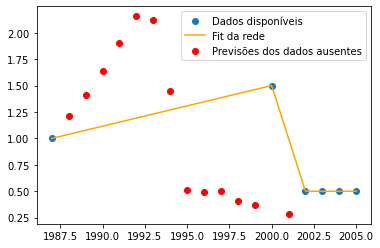

In [4]:
#Previsões
prev_geral = model.predict(ano_normalizado)*pi_std + pi_media
prev_ausentes = model.predict(aspi_normalizado)*pi_std + pi_media

#Plot dos dados e previsões
f1=plt.figure(1).add_subplot()
f1.scatter(ano,pesca_ind,label='Dados disponíveis')
f1.plot(ano,prev_geral,color='orange', label='Fit da rede' )
f1.scatter(anos_sem_pesca_ind,prev_ausentes, color='red', label='Previsões dos dados ausentes')

#Print das previsões
print('Previsões dos dados ausentes:', prev_ausentes)


plt.legend()
plt.show()